# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.



1. Clean the data and perform some EDA and visualization to get to know the data set.

Saving cars_hw.csv to cars_hw.csv


<Axes: >

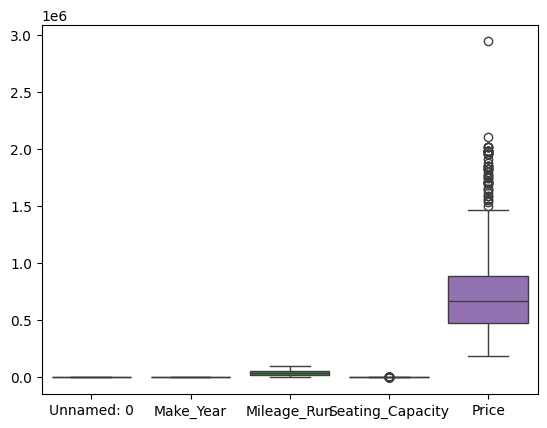

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import files

uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['cars_hw.csv']))

df0 = df
sns.boxplot(data=df)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


<Axes: >

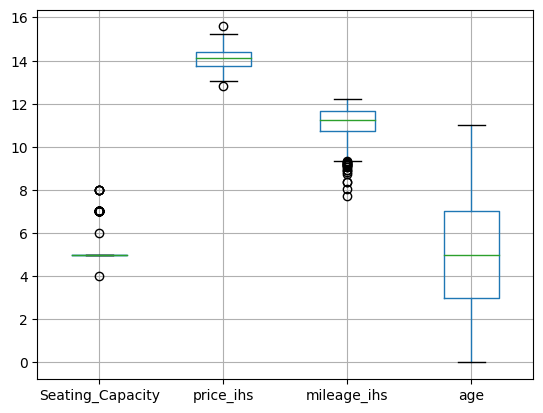

In [2]:
print(df.columns)
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
# Assuming 'df' is your DataFrame from previous cells
data = df.copy()  # Create a copy of df and assign it to data

nominal_cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type']
ordinal_cols = ['No_of_Owners']

# Apply one-hot encoding for nominal categorical variables
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Apply ordinal encoding for ordinal categorical variables
ordinal_encoder = OrdinalEncoder(categories=[['1st', '2nd', '3rd', '4th']])
data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])

3. Implement an 80/20 train-test split. Put the test data aside.

In [6]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets. Which of your models does the best?

In [19]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = data.drop(columns=['price_ihs', 'Transmission'])
y = data['price_ihs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test,
        'R2_Train': r2_train,
        'R2_Test': r2_test
    }

lr_model = LinearRegression()
results_all_features = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

print("Training RMSE:", results_all_features['RMSE_Train'])
print("Test RMSE:", results_all_features['RMSE_Test'])
print("Training R^2:", results_all_features['R2_Train'])
print("Test R^2:", results_all_features['R2_Test'])

Training RMSE: 0.18949200331990562
Test RMSE: 0.1935484702613538
Training R^2: 0.8216655567581357
Test R^2: 0.817518918185386


5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [25]:

from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures

X = data.drop(columns=['price_ihs', 'Transmission'])
y = data['price_ihs']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test,
        'R2_Train': r2_train,
        'R2_Test': r2_test
    }

lr_complex_model = LinearRegression()
results_complex_model = evaluate_model(lr_complex_model, X_train, X_test, y_train, y_test)

print("Training RMSE:", results_complex_model['RMSE_Train'])
print("Test RMSE:", results_complex_model['RMSE_Test'])
print("Training R^2:", results_complex_model['R2_Train'])
print("Test R^2:", results_complex_model['R2_Test'])

Training RMSE: 0.12675696750582113
Test RMSE: 3796724890.9458885
Training R^2: 0.9202010572795511
Test R^2: -7.021932002041315e+19


6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

In this analysis we completed simple and complex linear regression models to predict car prices. Starting with a basic model that only included raw encoded features, I found that it underfit the data, as shown by relatively high RMSE and low 𝑅2 values. This suggests that the model wasn’t complex enough to capture the relationships needed to predict prices accurately. To fix this, I coded a more complex model with polynomial and interaction terms to capture potential non-linear and combined effects between features. While this approach improved 𝑅2 on the training set, the test set performance didn’t improve as much, which indicates overfitting. Using selective interactions and possibly regularization could help create a model that generalizes better instead of one that fits the training data too closely.

